### **L1 Feature Selection**

In [ ]:
import pandas as E_AttPan
import seaborn as E_AttSea
import matplotlib.pyplot as E_AttPypl

E_Attrition = E_AttPan.read_csv('E_Attrition.csv')
E_Attrition

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2,1102,2,1,2,1,1,2,0,...,1,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,2,3,1,...,4,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,4,4,1,...,2,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,5,4,0,...,3,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,7,1,1,...,4,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,19,1,1367,1,11,1,3,771,3,0,...,2,0,0,3,2,0,0,0,0,1
2462,24,2,739,1,2,2,1,873,1,0,...,1,0,4,3,3,2,2,2,0,1
2463,27,2,1148,1,13,3,1,934,2,1,...,2,1,2,1,3,0,0,0,0,1
2464,47,1,799,1,7,2,2,1574,3,0,...,3,1,15,3,3,8,6,5,5,1


In [ ]:
print("Employee Attrition Shape: ",E_Attrition.shape)
E_Attrition['Attrition'].value_counts()

Employee Attrition Shape:  (2466, 33)


,count
Attrition,
1,1233
0,1233


**Applying L1 Feature Selection**

In [ ]:
from sklearn.linear_model import Lasso as E_AttritionL1

E_AttritionX = E_Attrition.drop('Attrition',axis=1)
E_AttritionY = E_Attrition['Attrition']

EAttMod = E_AttritionL1(alpha=0.01)
EAttMod.fit(E_AttritionX, E_AttritionY)

E_AttCoef = EAttMod.coef_      ###^^^%%% Determining the Best Features for Improved Accuracy
E_L1Feat = [e for e in range(len(E_AttCoef)) if E_AttCoef[e] != 1]
E_L1NFeatures = E_L1Feat[:20]   ###^^^%%% Choosing the Optimal Number of Features for Model Efficiency
E_SelFeatures = E_AttritionX.columns[E_L1NFeatures]

print('L1 Features for E_Attrition:\n', E_SelFeatures)
print('\nNumber of Features selected by L1 Feature Selection for E_Attrition:', len(E_SelFeatures))
E_AttritionX = E_AttritionX[E_SelFeatures]
E_AttritionX.shape

L1 Features for E_Attrition:
 Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18'],
      dtype='object')

Number of Features selected by L1 Feature Selection for E_Attrition: 20


(2466, 20)

In [ ]:
from sklearn.model_selection import train_test_split as E_AttTSpl

###^^^%%% Splitting the Data into 70% for Training, 15% for Validation, and 15% for Testing
E_AttritionXtrn, E_AttritiontXtst, E_AttritionYtrn, E_AttritionYtst = E_AttTSpl(E_AttritionX,E_AttritionY,test_size=0.3,random_state= 7)
E_AttritionXvld, E_AttritiontXtst, E_AttritionYvld, E_AttritionYtst = E_AttTSpl(E_AttritiontXtst,E_AttritionYtst,test_size=0.5,random_state= 7)
print("\nTraining Samples for E_Attrition: ",E_AttritionXtrn.shape)
print("Validation Samples for E_Attrition: ",E_AttritionXvld.shape)
print("Testing Samples for E_Attrition: ",E_AttritiontXtst.shape)


Training Samples for E_Attrition:  (1726, 20)
Validation Samples for E_Attrition:  (370, 20)
Testing Samples for E_Attrition:  (370, 20)


In [ ]:
from sklearn.model_selection import GridSearchCV as E_AttGsss
from sklearn import metrics as support_mtr
from sklearn.metrics import confusion_matrix as E_AttMx
from sklearn.metrics import ConfusionMatrixDisplay as Att_EMDS
from sklearn.metrics import classification_report as E_AttCR
import warnings as Att_EWARN
Att_EWARN.filterwarnings("ignore")
import matplotlib.pyplot as E_AttPypl

**Gradient Boosting Using L1 Feature Selection**

{'learning_rate': 0.3, 'loss': 'log_loss', 'n_estimators': 140}
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       193
           1       0.84      0.87      0.85       177

    accuracy                           0.86       370
   macro avg       0.86      0.86      0.86       370
weighted avg       0.86      0.86      0.86       370



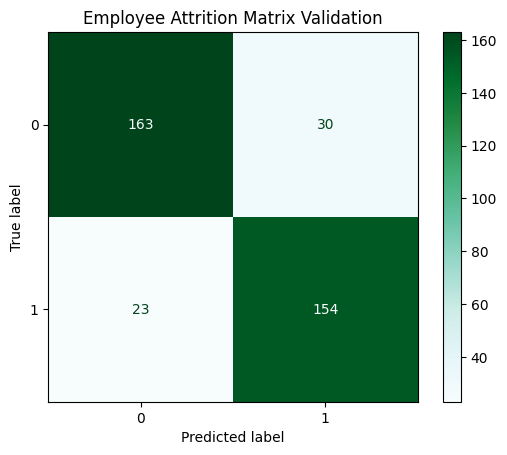

FPR for Validation E_Attrition: 0.15544041450777202
FNR for Validation E_Attrition: 0.12994350282485875


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier as E_AttGrb

Att_Eprm = { 'loss':['log_loss', 'exponential'],'learning_rate': [0.1, 0.3, 0.8],'n_estimators':[100, 140, 150, 200]}
Att_EMod = E_AttGrb(random_state=7)
Att_EMod = E_AttGsss(Att_EMod, Att_Eprm, cv=2)
Att_EMod.fit(E_AttritionXtrn.sample(400, random_state=7), E_AttritionYtrn.sample(400, random_state=7))
print(Att_EMod.best_params_)

Att_EMod = E_AttGrb(**Att_EMod.best_params_)
Att_EMod.fit(E_AttritionXtrn, E_AttritionYtrn) ### Training Model on E_Attrition Data

Att_YpredE = Att_EMod.predict(E_AttritionXvld) ### Validating Model on E_Attrition Data
print(E_AttCR(E_AttritionYvld, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYvld, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Validation")
E_AttPypl.show()

###^^^%%% Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Validation E_Attrition: {EAtt_flsprt}")
print(f"FNR for Validation E_Attrition: {EAtt_flsnrt}")

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       156
           1       0.92      0.87      0.89       214

    accuracy                           0.88       370
   macro avg       0.88      0.88      0.88       370
weighted avg       0.88      0.88      0.88       370



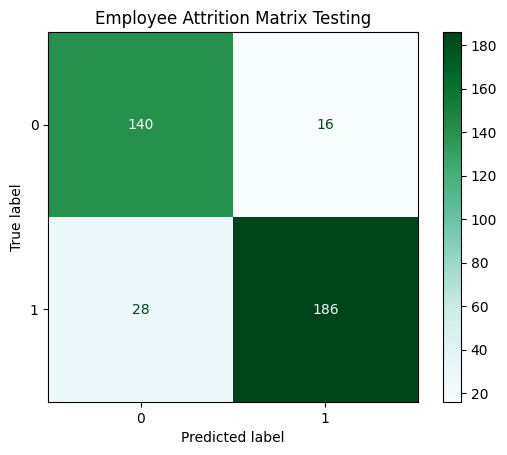

FPR for Testing E_Attrition: 0.10256410256410256
FNR for Testing E_Attrition: 0.1308411214953271


In [ ]:
Att_YpredE = Att_EMod.predict(E_AttritiontXtst) ### Testing Model on E_Attrition Data
print(E_AttCR(E_AttritionYtst, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYtst, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Testing")
E_AttPypl.show()

###^^^%%% Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Testing E_Attrition: {EAtt_flsprt}")
print(f"FNR for Testing E_Attrition: {EAtt_flsnrt}")

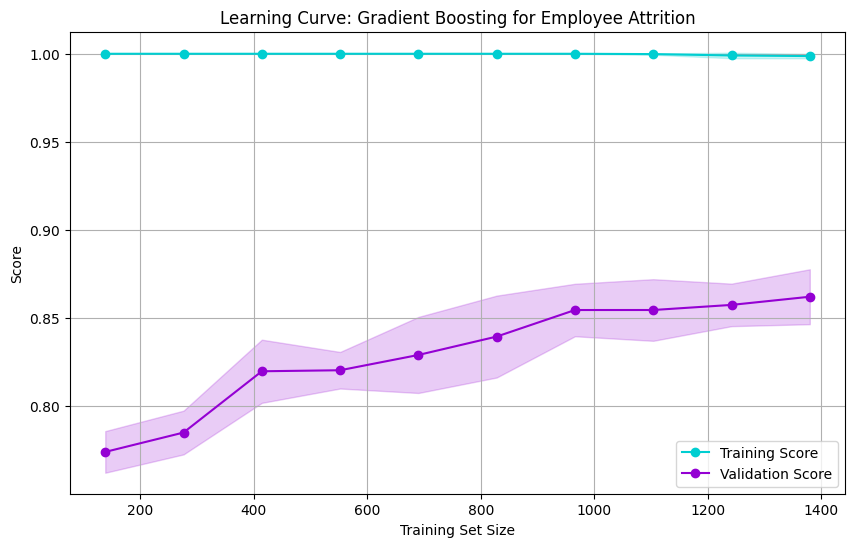

In [ ]:

from sklearn.model_selection import learning_curve as AttLearnCurve
import numpy as E_Attnu

def Emp_learningCurve(estimator, E_AttritionX, E_AttritionY, title="GB Learning Curve", cv=5, scoring="accuracy", n_jobs=-1):
    train_sizes, train_scores, val_scores = AttLearnCurve(
        estimator, E_AttritionX, E_AttritionY, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=E_Attnu.linspace(0.1, 1.0, 10)
    )

    ###^^^%%% Assessing the Mean and Standard Deviation for Data Analysis
    train_mean = E_Attnu.mean(train_scores, axis=1)
    train_std = E_Attnu.std(train_scores, axis=1)
    val_mean = E_Attnu.mean(val_scores, axis=1)
    val_std = E_Attnu.std(val_scores, axis=1)

    ###^^^%%% Visualizing Model Training with a Learning Curve
    E_AttPypl.figure(figsize=(10, 6))
    E_AttPypl.plot(train_sizes, train_mean, label="Training Score", color="darkturquoise", marker='o')
    E_AttPypl.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="darkturquoise", alpha=0.2)
    E_AttPypl.plot(train_sizes, val_mean, label="Validation Score", color="darkviolet", marker='o')
    E_AttPypl.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="darkviolet", alpha=0.2)

    E_AttPypl.title(title)
    E_AttPypl.xlabel("Training Set Size")
    E_AttPypl.ylabel("Score")
    E_AttPypl.legend(loc="best")
    E_AttPypl.grid()
    E_AttPypl.show()

Att_EMod = E_AttGrb(learning_rate= 0.3, loss= 'log_loss', n_estimators= 140) ###^^^%%%Tuning the Model with the Best-Performing Parameters

Emp_learningCurve(
    estimator=Att_EMod,
    E_AttritionX=E_AttritionXtrn,
    E_AttritionY=E_AttritionYtrn,
    title="Learning Curve: Gradient Boosting for Employee Attrition",
    cv=5
)

**Hist.Gradient Boosting L1 Feature Selection**

{'learning_rate': 0.8, 'max_depth': 5, 'max_iter': 200}
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       193
           1       0.87      0.89      0.88       177

    accuracy                           0.88       370
   macro avg       0.88      0.88      0.88       370
weighted avg       0.88      0.88      0.88       370



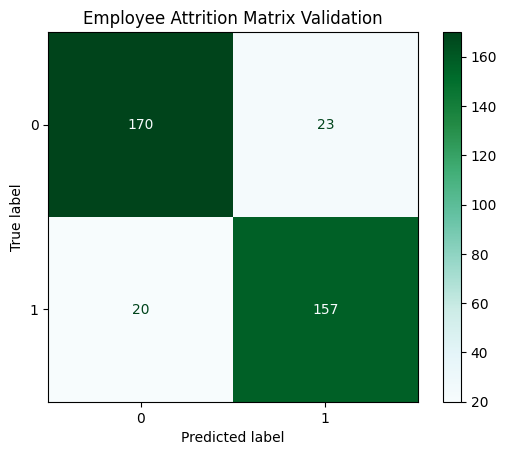

FPR for Validation E_Attrition: 0.11917098445595854
FNR for Validation E_Attrition: 0.11299435028248588


In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier as E_AttHisGrb

Att_Eprm = {'learning_rate': [0.1, 0.3, 0.8],'max_iter':[100,200,350],'max_depth':[2,5,8,9]}
Att_EMod = E_AttHisGrb(random_state=7)
Att_EMod = E_AttGsss(Att_EMod, Att_Eprm, cv=2)
Att_EMod.fit(E_AttritionXtrn.sample(400, random_state=7), E_AttritionYtrn.sample(400, random_state=7))
print(Att_EMod.best_params_)

Att_EMod = E_AttHisGrb(**Att_EMod.best_params_)
Att_EMod.fit(E_AttritionXtrn, E_AttritionYtrn) ###^^^%%% Training Model on E_Attrition Data

Att_YpredE = Att_EMod.predict(E_AttritionXvld) ###^^^%%% Validating Model on E_Attrition Data
print(E_AttCR(E_AttritionYvld, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYvld, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Validation")
E_AttPypl.show()

###^^^%%% Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Validation E_Attrition: {EAtt_flsprt}")
print(f"FNR for Validation E_Attrition: {EAtt_flsnrt}")

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       156
           1       0.91      0.86      0.89       214

    accuracy                           0.87       370
   macro avg       0.87      0.87      0.87       370
weighted avg       0.88      0.87      0.87       370



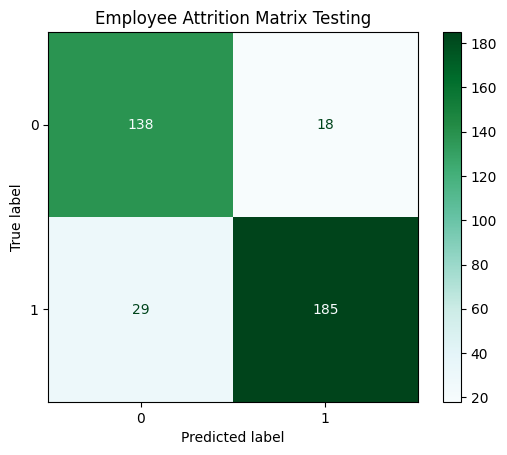

FPR for Testing E_Attrition: 0.11538461538461539
FNR for Testing E_Attrition: 0.13551401869158877


In [ ]:
Att_YpredE = Att_EMod.predict(E_AttritiontXtst) ###^^^%%% Testing Model on E_Attrition Data
print(E_AttCR(E_AttritionYtst, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYtst, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Testing")
E_AttPypl.show()

###^^^%%% Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Testing E_Attrition: {EAtt_flsprt}")
print(f"FNR for Testing E_Attrition: {EAtt_flsnrt}")

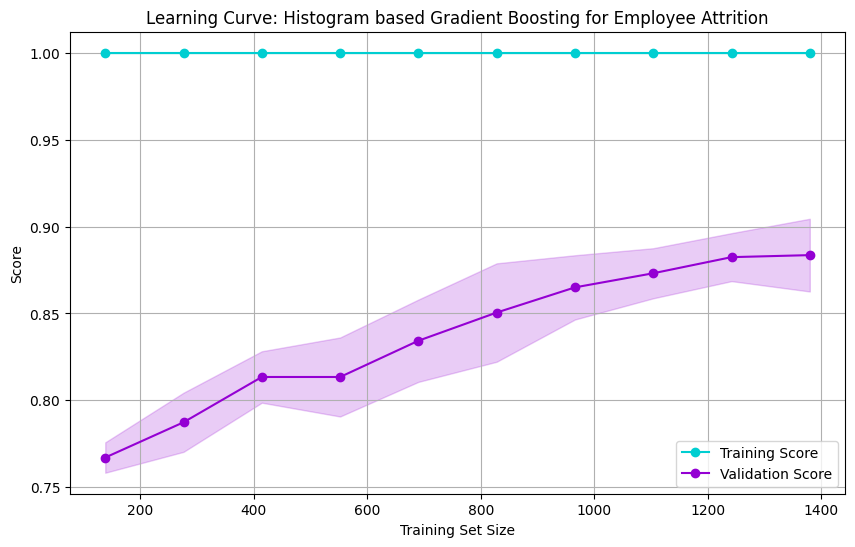

In [ ]:
def Emp_learningCurve(estimator, E_AttritionX, E_AttritionY, title="HistGB Learning Curve", cv=5, scoring="accuracy", n_jobs=-1):
    train_sizes, train_scores, val_scores = AttLearnCurve(
        estimator, E_AttritionX, E_AttritionY, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=E_Attnu.linspace(0.1, 1.0, 10)
    )

    ###^^^%%% Assessing the Mean and Standard Deviation for Data Analysis
    train_mean = E_Attnu.mean(train_scores, axis=1)
    train_std = E_Attnu.std(train_scores, axis=1)
    val_mean = E_Attnu.mean(val_scores, axis=1)
    val_std = E_Attnu.std(val_scores, axis=1)

    ###^^^%%% Visualizing Model Training with a Learning Curve
    E_AttPypl.figure(figsize=(10, 6))
    E_AttPypl.plot(train_sizes, train_mean, label="Training Score", color="darkturquoise", marker='o')
    E_AttPypl.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="darkturquoise", alpha=0.2)
    E_AttPypl.plot(train_sizes, val_mean, label="Validation Score", color="darkviolet", marker='o')
    E_AttPypl.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="darkviolet", alpha=0.2)

    E_AttPypl.title(title)
    E_AttPypl.xlabel("Training Set Size")
    E_AttPypl.ylabel("Score")
    E_AttPypl.legend(loc="best")
    E_AttPypl.grid()
    E_AttPypl.show()

Att_EMod = E_AttHisGrb(learning_rate= 0.8, max_depth= 5, max_iter= 200) ###^^^%%%Tuning the Model with the Best-Performing Parameters

Emp_learningCurve(
    estimator=Att_EMod,
    E_AttritionX=E_AttritionXtrn,
    E_AttritionY=E_AttritionYtrn,
    title="Learning Curve: Histogram based Gradient Boosting for Employee Attrition",
    cv=5
)

**Extreme Gradient Boosting L1 Feature Selection**

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       193
           1       0.83      0.86      0.85       177

    accuracy                           0.85       370
   macro avg       0.85      0.85      0.85       370
weighted avg       0.85      0.85      0.85       370



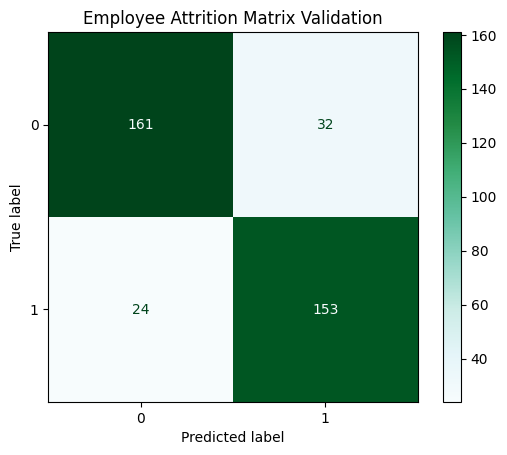

FPR for Validation E_Attrition: 0.16580310880829016
FNR for Validation E_Attrition: 0.13559322033898305


In [ ]:
from xgboost import XGBClassifier as E_AttExGrb

Att_Eprm = { 'max_depth':[2,5,7,9],'learning_rate': [0.1, 0.3, 0.8],'n_estimators':[100, 140, 150, 200]}
Att_EMod = E_AttExGrb(random_state=7)
Att_EMod = E_AttGsss(Att_EMod, Att_Eprm, cv=2)
Att_EMod.fit(E_AttritionXtrn.sample(400, random_state=7), E_AttritionYtrn.sample(400, random_state=7))
print(Att_EMod.best_params_)

Att_EMod = E_AttExGrb(**Att_EMod.best_params_)
Att_EMod.fit(E_AttritionXtrn, E_AttritionYtrn) ###^^^%%% Training Model on E_Attrition Data

Att_YpredE = Att_EMod.predict(E_AttritionXvld) ###^^^%%% Validating Model on E_Attrition Data
print(E_AttCR(E_AttritionYvld, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYvld, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Validation")
E_AttPypl.show()

###^^^%%% Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Validation E_Attrition: {EAtt_flsprt}")
print(f"FNR for Validation E_Attrition: {EAtt_flsnrt}")

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       156
           1       0.91      0.83      0.87       214

    accuracy                           0.86       370
   macro avg       0.85      0.86      0.86       370
weighted avg       0.86      0.86      0.86       370



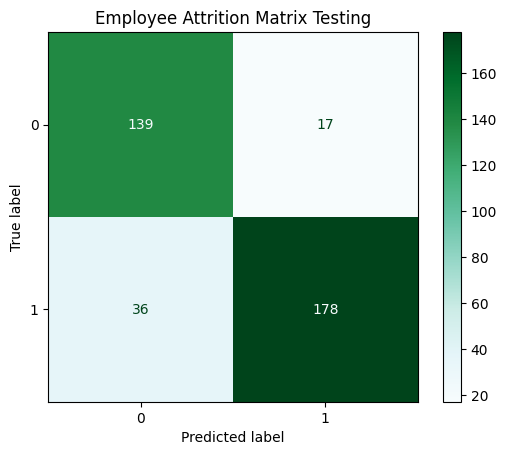

FPR for Testing E_Attrition: 0.10897435897435898
FNR for Testing E_Attrition: 0.16822429906542055


In [ ]:
Att_YpredE = Att_EMod.predict(E_AttritiontXtst) ###^^^%%% Testing Model on E_Attrition Data
print(E_AttCR(E_AttritionYtst, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYtst, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Testing")
E_AttPypl.show()

###^^^%%% Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Testing E_Attrition: {EAtt_flsprt}")
print(f"FNR for Testing E_Attrition: {EAtt_flsnrt}")

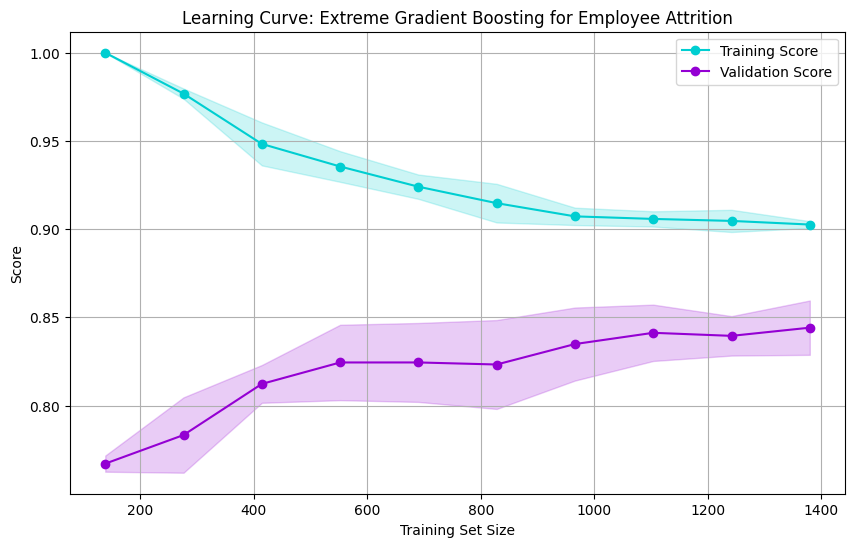

In [ ]:
def Emp_learningCurve(estimator, E_AttritionX, E_AttritionY, title="XGB Learning Curve", cv=5, scoring="accuracy", n_jobs=-1):
    train_sizes, train_scores, val_scores = AttLearnCurve(
        estimator, E_AttritionX, E_AttritionY, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=E_Attnu.linspace(0.1, 1.0, 10)
    )

    ###^^^%%% Assessing the Mean and Standard Deviation for Data Analysis
    train_mean = E_Attnu.mean(train_scores, axis=1)
    train_std = E_Attnu.std(train_scores, axis=1)
    val_mean = E_Attnu.mean(val_scores, axis=1)
    val_std = E_Attnu.std(val_scores, axis=1)

    ###^^^%%% Visualizing Model Training with a Learning Curve
    E_AttPypl.figure(figsize=(10, 6))
    E_AttPypl.plot(train_sizes, train_mean, label="Training Score", color="darkturquoise", marker='o')
    E_AttPypl.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="darkturquoise", alpha=0.2)
    E_AttPypl.plot(train_sizes, val_mean, label="Validation Score", color="darkviolet", marker='o')
    E_AttPypl.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="darkviolet", alpha=0.2)

    E_AttPypl.title(title)
    E_AttPypl.xlabel("Training Set Size")
    E_AttPypl.ylabel("Score")
    E_AttPypl.legend(loc="best")
    E_AttPypl.grid()
    E_AttPypl.show()

Att_EMod = E_AttExGrb(learning_rate= 0.1, max_depth= 2, n_estimators= 200) ###^^^%%%Tuning the Model with the Best-Performing Parameters

Emp_learningCurve(
    estimator=Att_EMod,
    E_AttritionX=E_AttritionXtrn,
    E_AttritionY=E_AttritionYtrn,
    title="Learning Curve: Extreme Gradient Boosting for Employee Attrition",
    cv=5
)

**Decision Tree Using L1 Feature Selection**

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 4}
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       193
           1       0.75      0.78      0.76       177

    accuracy                           0.77       370
   macro avg       0.77      0.77      0.77       370
weighted avg       0.77      0.77      0.77       370



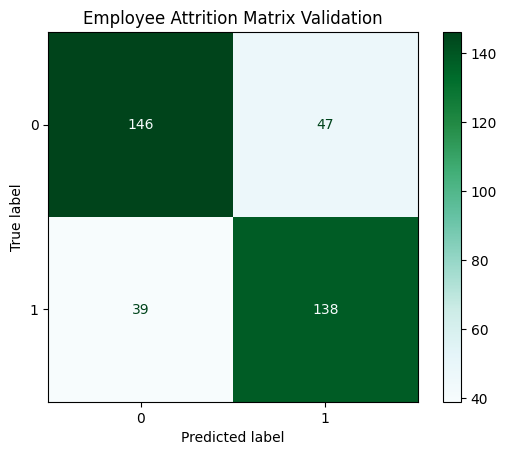

FPR for Validation E_Attrition: 0.24352331606217617
FNR for Validation E_Attrition: 0.22033898305084745


In [ ]:
from sklearn.tree import DecisionTreeClassifier as E_AttDEC

Att_Eprm = {'criterion':['gini', 'entropy', 'log_loss'],'max_depth': [10, 5, 8, 3],'min_samples_split':[2, 4, 5, 7]}
Att_EMod = E_AttDEC(random_state=7)
Att_EMod = E_AttGsss(Att_EMod, Att_Eprm, cv=2)
Att_EMod.fit(E_AttritionXtrn.sample(400, random_state=7), E_AttritionYtrn.sample(400, random_state=7))
print(Att_EMod.best_params_)

Att_EMod = E_AttDEC(**Att_EMod.best_params_)
Att_EMod.fit(E_AttritionXtrn, E_AttritionYtrn) ###^^^%%% Training Model on E_Attrition Data

Att_YpredE = Att_EMod.predict(E_AttritionXvld) ###^^^%%% Validating Model on E_Attrition Data
print(E_AttCR(E_AttritionYvld, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYvld, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Validation")
E_AttPypl.show()

###^^^%%% Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Validation E_Attrition: {EAtt_flsprt}")
print(f"FNR for Validation E_Attrition: {EAtt_flsnrt}")

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       156
           1       0.79      0.80      0.79       214

    accuracy                           0.76       370
   macro avg       0.75      0.75      0.75       370
weighted avg       0.76      0.76      0.76       370



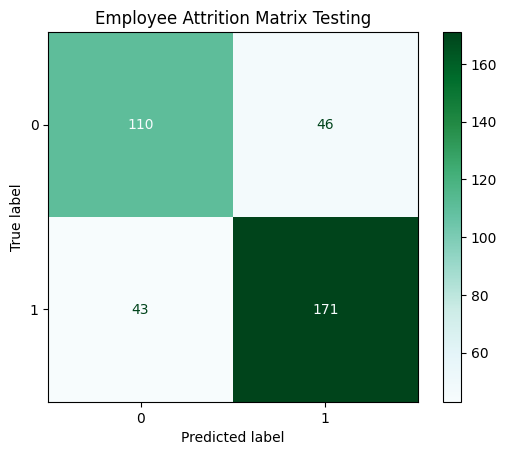

FPR for Testing E_Attrition: 0.2948717948717949
FNR for Testing E_Attrition: 0.20093457943925233


In [ ]:
Att_YpredE = Att_EMod.predict(E_AttritiontXtst) ###^^^%%% Testing Model on E_Attrition Data
print(E_AttCR(E_AttritionYtst, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYtst, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Testing")
E_AttPypl.show()

###^^^%%% Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Testing E_Attrition: {EAtt_flsprt}")
print(f"FNR for Testing E_Attrition: {EAtt_flsnrt}")

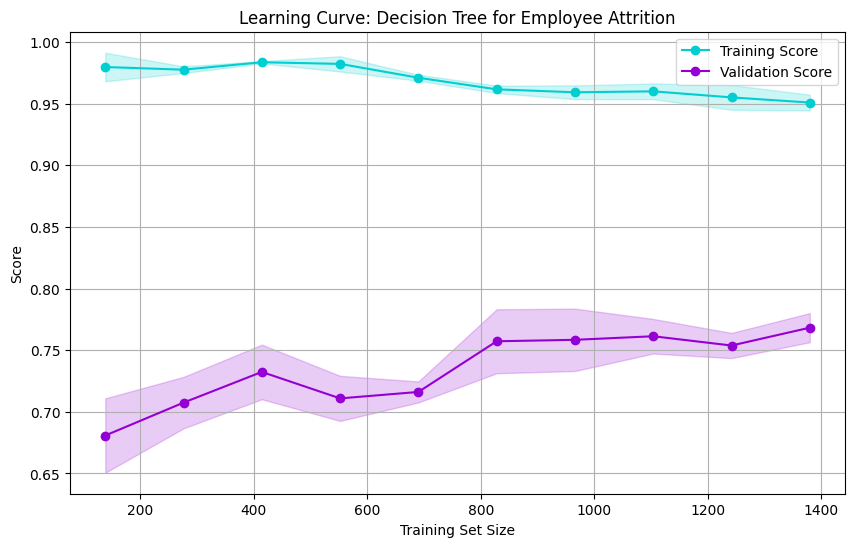

In [ ]:
def Emp_learningCurve(estimator, E_AttritionX, E_AttritionY, title="DT Learning Curve", cv=5, scoring="accuracy", n_jobs=-1):
    train_sizes, train_scores, val_scores = AttLearnCurve(
        estimator, E_AttritionX, E_AttritionY, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=E_Attnu.linspace(0.1, 1.0, 10)
    )

    ###^^^%%% Assessing the Mean and Standard Deviation for Data Analysis
    train_mean = E_Attnu.mean(train_scores, axis=1)
    train_std = E_Attnu.std(train_scores, axis=1)
    val_mean = E_Attnu.mean(val_scores, axis=1)
    val_std = E_Attnu.std(val_scores, axis=1)

    ###^^^%%% Visualizing Model Training with a Learning Curve
    E_AttPypl.figure(figsize=(10, 6))
    E_AttPypl.plot(train_sizes, train_mean, label="Training Score", color="darkturquoise", marker='o')
    E_AttPypl.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="darkturquoise", alpha=0.2)
    E_AttPypl.plot(train_sizes, val_mean, label="Validation Score", color="darkviolet", marker='o')
    E_AttPypl.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="darkviolet", alpha=0.2)

    E_AttPypl.title(title)
    E_AttPypl.xlabel("Training Set Size")
    E_AttPypl.ylabel("Score")
    E_AttPypl.legend(loc="best")
    E_AttPypl.grid()
    E_AttPypl.show()

Att_EMod = E_AttDEC(criterion= 'gini', max_depth= 10, min_samples_split= 4) ###^^^%%%Tuning the Model with the Best-Performing Parameters

Emp_learningCurve(
    estimator=Att_EMod,
    E_AttritionX=E_AttritionXtrn,
    E_AttritionY=E_AttritionYtrn,
    title="Learning Curve: Decision Tree for Employee Attrition",
    cv=5
)

**MLP Using L1 Feature Selection**

{'activation': 'logistic', 'hidden_layer_sizes': 10, 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.77      0.16      0.26       193
           1       0.51      0.95      0.66       177

    accuracy                           0.54       370
   macro avg       0.64      0.55      0.46       370
weighted avg       0.64      0.54      0.45       370



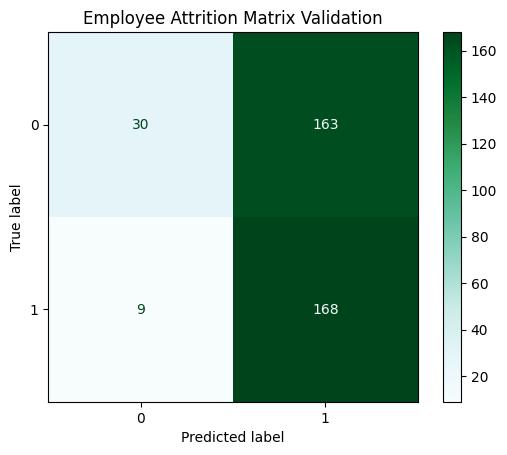

FPR for Validation E_Attrition: 0.844559585492228
FNR for Validation E_Attrition: 0.05084745762711865


In [ ]:
from sklearn.neural_network import MLPClassifier as E_AttMult

Att_Eprm = {'hidden_layer_sizes':[10, 20, 30],'activation': ['relu','tanh','logistic'],'solver':['lbfgs','adam','sgd']}
Att_EMod = E_AttMult(random_state=7)
Att_EMod = E_AttGsss(Att_EMod, Att_Eprm, cv=2)
Att_EMod.fit(E_AttritionXtrn.sample(400, random_state=7), E_AttritionYtrn.sample(400, random_state=7))
print(Att_EMod.best_params_)

Att_EMod = E_AttMult(**Att_EMod.best_params_)
Att_EMod.fit(E_AttritionXtrn, E_AttritionYtrn) ###^^^%%% Training Model on E_Attrition Data

Att_YpredE = Att_EMod.predict(E_AttritionXvld) ###^^^%%% Validating Model on E_Attrition Data
print(E_AttCR(E_AttritionYvld, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYvld, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Validation")
E_AttPypl.show()

###^^^%%% Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Validation E_Attrition: {EAtt_flsprt}")
print(f"FNR for Validation E_Attrition: {EAtt_flsnrt}")

              precision    recall  f1-score   support

           0       0.66      0.13      0.22       156
           1       0.60      0.95      0.74       214

    accuracy                           0.61       370
   macro avg       0.63      0.54      0.48       370
weighted avg       0.62      0.61      0.52       370



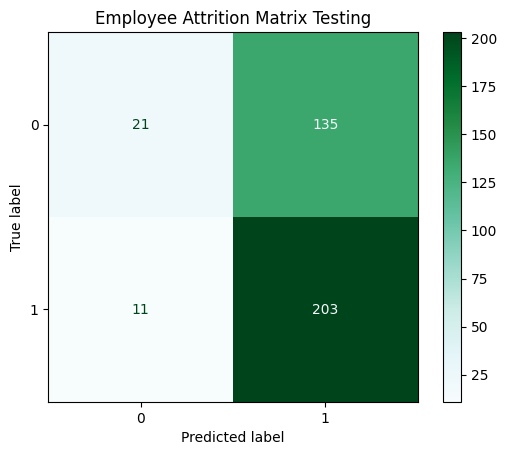

FPR for Testing E_Attrition: 0.8653846153846154
FNR for Testing E_Attrition: 0.0514018691588785


In [ ]:
Att_YpredE = Att_EMod.predict(E_AttritiontXtst) ###^^^%%% Testing Model on E_Attrition Data
print(E_AttCR(E_AttritionYtst, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYtst, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Testing")
E_AttPypl.show()

###^^^%%% Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Testing E_Attrition: {EAtt_flsprt}")
print(f"FNR for Testing E_Attrition: {EAtt_flsnrt}")

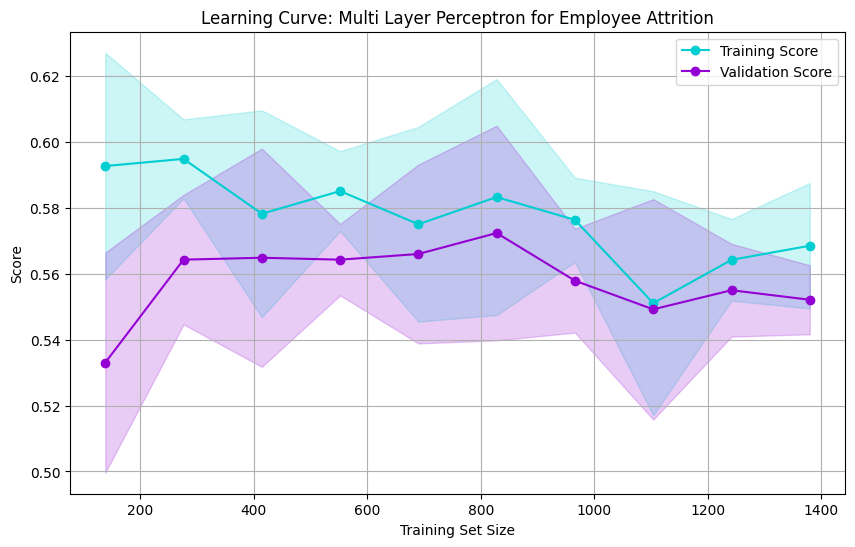

In [ ]:
def Emp_learningCurve(estimator, E_AttritionX, E_AttritionY, title="MLP Learning Curve", cv=5, scoring="accuracy", n_jobs=-1):
    train_sizes, train_scores, val_scores = AttLearnCurve(
        estimator, E_AttritionX, E_AttritionY, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=E_Attnu.linspace(0.1, 1.0, 10)
    )

    ###^^^%%% Assessing the Mean and Standard Deviation for Data Analysis
    train_mean = E_Attnu.mean(train_scores, axis=1)
    train_std = E_Attnu.std(train_scores, axis=1)
    val_mean = E_Attnu.mean(val_scores, axis=1)
    val_std = E_Attnu.std(val_scores, axis=1)

    ###^^^%%% Visualizing Model Training with a Learning Curve
    E_AttPypl.figure(figsize=(10, 6))
    E_AttPypl.plot(train_sizes, train_mean, label="Training Score", color="darkturquoise", marker='o')
    E_AttPypl.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="darkturquoise", alpha=0.2)
    E_AttPypl.plot(train_sizes, val_mean, label="Validation Score", color="darkviolet", marker='o')
    E_AttPypl.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="darkviolet", alpha=0.2)

    E_AttPypl.title(title)
    E_AttPypl.xlabel("Training Set Size")
    E_AttPypl.ylabel("Score")
    E_AttPypl.legend(loc="best")
    E_AttPypl.grid()
    E_AttPypl.show()

Att_EMod = E_AttMult(activation= 'logistic', hidden_layer_sizes= 10, solver= 'lbfgs') ###^^^%%%Tuning the Model with the Best-Performing Parameters

Emp_learningCurve(
    estimator=Att_EMod,
    E_AttritionX=E_AttritionXtrn,
    E_AttritionY=E_AttritionYtrn,
    title="Learning Curve: Multi Layer Perceptron for Employee Attrition",
    cv=5
)